# ***Kütüphane Kurulumları***

In [1]:
pip install pandas

In [2]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# ***Verinin İçe Aktarılması***

In [15]:
data_path = '../Pusula/side_effect_data 1.xlsx'
data = pd.read_excel(data_path)

# ***Keşifsel Veri Analizi***

Veri setlerinin büyüklüğüne bağlı olarak genelde öznitelikleri tek tek inceler. Hangi değerleri alır ? Aykırı değerler var mı ? Eksik verilerin analizini yaparım. Eksik verilerde belli bir pattern var mı ? Yoksa olmayan bir durum geçerli mi?(Öznitelik 'yok' değeri gibi bir değer alabilir mi?). Daha sonrasında görselleştirerek öznitelikler arası ilişkileri aramaya geçerim.

In [16]:
data.head(10)

,Kullanici_id,Cinsiyet,Dogum_Tarihi,Uyruk,Il,Ilac_Adi,Ilac_Baslangic_Tarihi,Ilac_Bitis_Tarihi,Yan_Etki,Yan_Etki_Bildirim_Tarihi,Alerjilerim,Kronik Hastaliklarim,Baba Kronik Hastaliklari,Anne Kronik Hastaliklari,Kiz Kardes Kronik Hastaliklari,Erkek Kardes Kronik Hastaliklari,Kan Grubu,Kilo,Boy
0,107,Male,1960-03-01,Turkiye,Canakkale,trifluoperazine,2022-01-09,2022-03-04,Kabizlik,2022-02-19 18:28:43,Ceviz,"Hipertansiyon, Kan Hastaliklari","Guatr, Hipertansiyon",KOAH,"Kemik Erimesi, Kalp Hastaliklari","Kemik Erimesi, Guatr",B RH-,103.0,191.0
1,140,Male,1939-10-12,Turkiye,Trabzon,fluphenazine hcl,2022-01-09,2022-03-08,Yorgunluk,2022-02-03 20:48:17,Toz,NaN,"Guatr, Diger","Hipertansiyon, Kalp Hastaliklari",,"KOAH, Diyabet",NaN,81.0,181.0
2,2,Female,1976-12-17,Turkiye,Canakkale,warfarin sodium,2022-01-11,2022-03-12,Carpinti,2022-02-04 05:29:20,Muz,"Kalp Hastaliklari, Diyabet","Diyabet, KOAH","Kemik Erimesi, Diyabet","Diyabet, Kemik Erimesi",Diger,B RH-,93.0,158.0
3,83,Male,1977-06-17,Turkiye,Adana,valproic acid,2022-01-04,2022-03-12,Sinirlilik,2022-02-08 01:01:21,Pancar,"Diyabet, Diger","Kalp Hastaliklari, Diger",NaN,Astim,"Kalp Hastaliklari, Kanser",AB RH-,NaN,165.0
4,7,Female,1976-09-03,Turkiye,Izmir,carbamazepine extended release,2022-01-13,2022-03-06,Agizda Farkli Bir Tat,2022-02-12 05:33:06,NaN,"Diyabet, Kalp Hastaliklari","Alzheimer, Hipertansiyon","Kan Hastaliklari, Kemik Erimesi","Diyabet, Diger","Alzheimer, Hipertansiyon",AB RH-,99.0,172.0
5,131,Male,1982-01-05,Turkiye,NaN,fluoxetine dr,2022-01-07,2022-03-19,Agizda Farkli Bir Tat,2022-02-04 08:08:31,NaN,"Diyabet, Hipertansiyon",NaN,"Alzheimer, Kalp Hastaliklari",Kanser,"Diyabet, Kemik Erimesi",AB RH-,66.0,150.0
6,61,NaN,1997-01-10,Turkiye,Mersin,carbamazepine extended release,2022-01-05,2022-03-07,Agizda Farkli Bir Tat,2022-02-19 17:39:48,Bugday,"KOAH, Diyabet","Kalp Hastaliklari, Kan Hastaliklari",NaN,"Kan Hastaliklari, Hipertansiyon","KOAH, Kalp Hastaliklari",NaN,NaN,147.0
7,95,NaN,1997-01-15,Turkiye,Antalya,thiothixene,2022-01-10,2022-03-07,Deride Morarma,2022-02-09 20:53:54,Ispanak,"Astim, Diyabet","Alzheimer, Diyabet",KOAH,"Guatr, Kan Hastaliklari","Guatr, Kan Hastaliklari",B RH+,96.0,162.0
8,3,Female,1973-08-05,Turkiye,NaN,"asenapine tablet, sublingual",2022-01-08,2022-03-17,Bas Agrisi,2022-02-19 04:14:26,Laktoz,NaN,"Kan Hastaliklari, Diger","Kanser, Guatr","Alzheimer, Hipertansiyon","Kanser, Kalp Hastaliklari",0 RH-,91.0,NaN
9,53,NaN,1941-10-16,Turkiye,Adana,fluphenazine hcl elixir,2022-01-10,2022-03-13,Gormede Bulaniklik,2022-02-09 01:16:50,Elma,"Kemik Erimesi, KOAH",Hipertansiyon,"KOAH, Alzheimer","KOAH, Alzheimer","Astim, Kan Hastaliklari",0 RH-,107.0,156.0


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2357 entries, 0 to 2356
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Kullanici_id                      2357 non-null   int64         
 1   Cinsiyet                          1579 non-null   object        
 2   Dogum_Tarihi                      2357 non-null   datetime64[ns]
 3   Uyruk                             2357 non-null   object        
 4   Il                                2130 non-null   object        
 5   Ilac_Adi                          2357 non-null   object        
 6   Ilac_Baslangic_Tarihi             2357 non-null   datetime64[ns]
 7   Ilac_Bitis_Tarihi                 2357 non-null   datetime64[ns]
 8   Yan_Etki                          2357 non-null   object        
 9   Yan_Etki_Bildirim_Tarihi          2357 non-null   datetime64[ns]
 10  Alerjilerim                       1873 non-null 

In [18]:
data.duplicated().sum()

np.int64(0)

***Kullanici id veri setinde hastaya ait unique öznitelik, Cinsiyet Özniteliğini inceleyerek başlayacağım***

# Cinsiyet Özniteliği

In [19]:
data['Cinsiyet'].value_counts(dropna = False)

Cinsiyet
Female    872
NaN       778
Male      707
Name: count, dtype: int64

***Cinsiyet Özniteliğinin eksik verilerini doldurmak için diğer özniteliklerle ilişkisinin kontrolü***

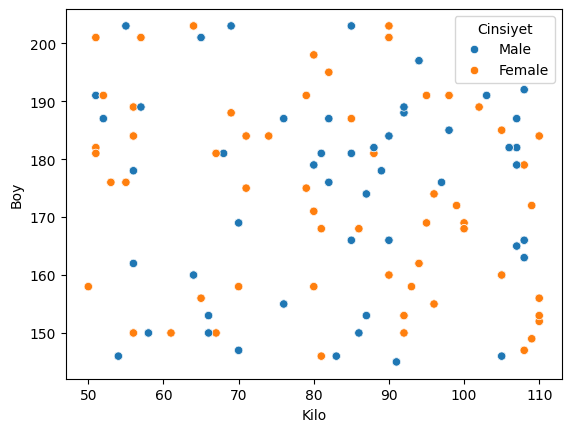

In [20]:
sns.scatterplot(data, x = 'Kilo', y= 'Boy', hue = 'Cinsiyet')
plt.show()

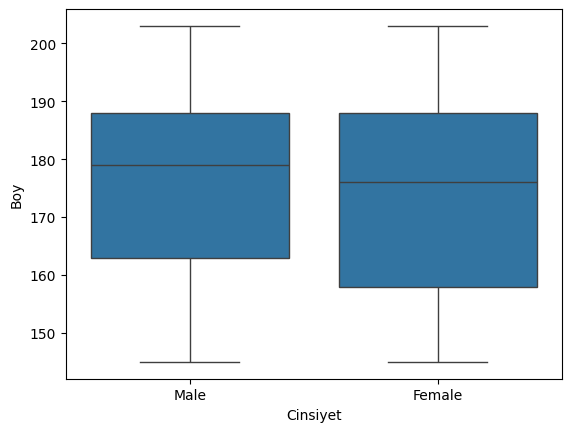

In [21]:
sns.boxplot(data, x = 'Cinsiyet' , y = 'Boy')
plt.show()

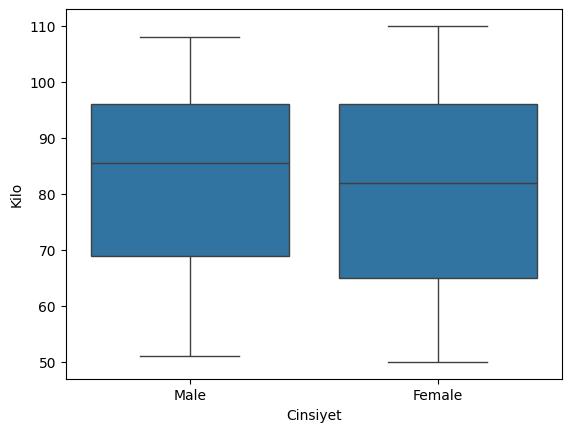

In [22]:
sns.boxplot(data, x = 'Cinsiyet' , y = 'Kilo')
plt.show()

In [23]:
data.groupby(['Ilac_Adi'])['Cinsiyet'].value_counts()

Ilac_Adi                     Cinsiyet
Levomilnacipran              Male        9
                             Female      7
Mometasone furoate           Male        5
                             Female      2
Prednicarbate cream          Female      7
                                        ..
ziprasidone                  Male        2
ziprasidone vial             Female      5
                             Male        3
zolpidem tablet, sublingual  Female      6
                             Male        3
Name: count, Length: 302, dtype: int64

In [24]:
#Alerji özniteliğinin eksik verilerinin hastanın alerjisi olmadığını varsayarak doldurdum.
#Verinin nasıl toplandığına göre değişiklik gösterebilir. Herhangi bir bilgi aktarılmadığı için öyle düşündüm.
data['Alerjilerim'] = data['Alerjilerim'].fillna('Yok')
data.groupby(['Alerjilerim'])['Cinsiyet'].value_counts()

Alerjilerim      Cinsiyet
Bal              Female       29
                 Male         14
Balik            Female       26
                 Male         16
Bugday           Male         22
Ceviz            Male         17
Cikolata         Male         24
Deniz Urunler    Female       62
                 Male         16
Domates          Male         61
                 Female       34
Elma             Male         12
                 Female        8
Havyar           Male         40
                 Female       37
Ispanak          Male         30
                 Female        6
Ispanakgiller    Female       48
                 Male         12
Istiridye        Female       38
Kabak Cekirdegi  Female       28
                 Male         10
Kahve            Male         36
                 Female       23
Kakao            Male         11
Karaciger        Female       26
                 Male         15
Kedi             Male         26
Kefir            Male         44
                 

In [25]:
#Veri setinin boy,kilo özniteliklerine bağlı cinsiyet çıkarımı yapmak mümkün değil. 
#Fakat bazı alerjilere bakarsak(İstiridye örnek olarak) Cinsiyet genellemesi yapabiliriz.

In [26]:
#Alerjilere göre cinsiyet genellemesi yapmak için çoğunlukla erkeklerin sahip olduğu ve çoğunlukla kadınların sahip olduğu alerjileri ayrıştırdım.
erkek_alerjileri = ['Bugday', 'Ceviz', 'Cikolata', 'Kedi', 
                    'Kakao', 'Domates', 'Elma', 'Havyar', 
                    'Ispanak', 'Kahve', 'Kefir', 'Muz', 'Toz']
kadın_alerjileri = ['Bal', 'Balik', 'Deniz Urunler', 'Ispanakgiller', 
                    'Kabak Cekirdegi', 'Karaciger', 'Laktoz', 'Sari Kantaron',
                    'Pancar', 'Istiridye', 'Kopek', 'Lateks', 'Kolali Icecek', 'Sut', 'Yogurt', 'Yok']
(len(erkek_alerjileri) + len(kadın_alerjileri)) == len(data['Alerjilerim'].value_counts())

True

In [27]:
data[data['Alerjilerim'].isin(erkek_alerjileri)]['Cinsiyet'].value_counts(dropna = False)

Cinsiyet
Male      395
NaN       254
Female    183
Name: count, dtype: int64

In [28]:
data.loc[data['Alerjilerim'].isin(erkek_alerjileri), 'Cinsiyet'] = data.loc[data['Alerjilerim'].isin(erkek_alerjileri), 'Cinsiyet'].fillna('Male') 
data.loc[data['Alerjilerim'].isin(kadın_alerjileri), 'Cinsiyet'] = data.loc[data['Alerjilerim'].isin(kadın_alerjileri), 'Cinsiyet'].fillna('Female') 

In [29]:
data['Cinsiyet'].value_counts(dropna = False)

Cinsiyet
Female    1396
Male       961
Name: count, dtype: int64

# Doğum Tarihi Özniteliği

In [30]:
#Veri değerlerinin kontrolü
data['Dogum_Tarihi'].describe()
#Min-Max değerlere bakılırsa Doğum tarihi özniteliğinde bir problem gözükmüyor.

count                             2357
mean     1974-11-25 04:06:12.677131936
min                1939-10-12 00:00:00
25%                1959-02-05 00:00:00
50%                1973-09-09 00:00:00
75%                1992-03-24 00:00:00
max                2011-04-25 00:00:00
Name: Dogum_Tarihi, dtype: object

In [31]:
#Doğum tarihi özniteliğinden hastaların 'Yaş' Özniteliği çıkarılabilir. Modelleme yapılacaksa önemli bir öznitelik olabilir.
today = pd.Timestamp.today()
data['Yas'] = today.year - data['Dogum_Tarihi'].dt.year

In [32]:
data['Yas'].head(10)

0    64
1    85
2    48
3    47
4    48
5    42
6    27
7    27
8    51
9    83
Name: Yas, dtype: int32

# Uyruk Özniteliği

In [33]:
data['Uyruk'].value_counts(dropna = False)
#Öznitelikte herhangi bir düzenleme yapılmayacak.

Uyruk
Turkiye    2357
Name: count, dtype: int64

# İl özniteliği

In [34]:
data['Il'].value_counts(dropna = False)

Il
NaN          227
Adana        220
Mersin       207
Trabzon      195
Canakkale    179
Ankara       179
Eskisehir    174
Antalya      171
Bursa        169
Samsun       153
Istanbul     144
Izmir        121
Malatya      109
Kayseri      109
Name: count, dtype: int64

In [35]:
data['Il'] = data['Il'].fillna('Belirtilmedi')
#İl özniteliğinin eksik verilerinin veriler toplanırken belirtilmeme durumu olması ihtimalini göz önüne alarak doldurdum.
#Özniteliğin yan_etkiler için önemli bir öznitelik olmadığını düşünüyorum.

# İlaç adı Özniteliği

In [36]:
data['Ilac_Adi'].value_counts()

Ilac_Adi
chlordiazepoxide-amitriptyline                             29
hydrocortisone cream                                       27
lurasidone                                                 27
loxapine                                                   26
desvenlafaxine succinate tablet, extended release 24 hr    26
                                                           ..
risperdal consta syringe                                    8
desoximetasone ointment                                     8
citalopram                                                  8
pethidine hcl                                               8
lithium carbonate                                           7
Name: count, Length: 151, dtype: int64

In [37]:
data[data['Ilac_Adi'].str.contains('extended release')]['Ilac_Adi'].value_counts()

Ilac_Adi
desvenlafaxine succinate tablet, extended release 24 hr                                                                     26
carbamazepine extended release                                                                                              25
methylphenidate suspension, extended release 24 hr, reconstituted (suspension, er reconstituted)                            19
bupropion hbr tablet, extended release 24 hr                                                                                14
methylphenidate er tablet, extended release 24 hr                                                                           10
methylphenidate tablet,chewable,immediate release and extended release,biphasic 24 hr (tablet,chew,immed-exten.rel 24hr)     9
Name: count, dtype: int64

In [38]:
data[data['Ilac_Adi'].str.contains('tablet')]['Ilac_Adi'].value_counts()

Ilac_Adi
desvenlafaxine succinate tablet, extended release 24 hr                                                                     26
asenapine sublingual tablet                                                                                                 23
fluphenazine hcl tablet                                                                                                     19
zolpidem tablet, sublingual                                                                                                 17
doxepin hcl tablet                                                                                                          17
methylphenidate hcl tablet, chewable                                                                                        16
asenapine tablet, sublingual                                                                                                15
isocarboxazid tablet                                                                                  

In [39]:
data[data['Ilac_Adi'].str.contains('aripiprazole')]['Ilac_Adi'].value_counts()

Ilac_Adi
aripiprazole odt                             19
aripiprazole tablet with sensor and patch    14
aripiprazole                                 10
Name: count, dtype: int64

In [40]:
data[data['Ilac_Adi'].str.contains(',')]['Ilac_Adi'].value_counts()

Ilac_Adi
desvenlafaxine succinate tablet, extended release 24 hr                                                                     26
betamethasone dipropionate aerosol, spray with pump                                                                         24
divalproex sodium capsule, sprinkle                                                                                         19
methylphenidate suspension, extended release 24 hr, reconstituted (suspension, er reconstituted)                            19
zolpidem tablet, sublingual                                                                                                 17
methylphenidate hcl tablet, chewable                                                                                        16
desoximetasone spray, non-aerosol                                                                                           16
asenapine tablet, sublingual                                                                          

In [41]:
#Değere bakılacak olursa ve ufak bir araştırma sonucu bazı 
#ilaçların aktif maddesinin aynı olduğu fark yaratan kısmın ilacın nasıl kullanılacağının belirlediğini gözlemledim.
#Analiz sürecinde bu özniteliğe ek bir uygulama yapmayacağım.
#Bu alanda yetkinliğe sahip birine danışılarak ilacın kullanım şeklinin yan etkiye etkisinin olup olmadığı bilgisi edinilirse
#bu öznitelikten yeni bilgiler çıkarılabilir.

# Ilac Baslangic Tarihi ve Ilac Bitis Tarihi Öznitelikleri

In [42]:
#Öznitelikleri beraber ele alacağım. Bu özniteliklerden kullanım süresi çıkarımı yapacağım. 
#Öncelikle aykırı, anlamsız değerler var mı kontrol edeceğim

In [43]:
data['Ilac_Baslangic_Tarihi'].describe()

count                             2357
mean     2022-01-07 10:47:36.173101312
min                2022-01-01 00:00:00
25%                2022-01-04 00:00:00
50%                2022-01-07 00:00:00
75%                2022-01-11 00:00:00
max                2022-01-14 00:00:00
Name: Ilac_Baslangic_Tarihi, dtype: object

In [44]:
data['Ilac_Bitis_Tarihi'].describe()

count                             2357
mean     2022-03-10 16:25:27.365294848
min                2022-03-02 00:00:00
25%                2022-03-06 00:00:00
50%                2022-03-11 00:00:00
75%                2022-03-15 00:00:00
max                2022-03-19 00:00:00
Name: Ilac_Bitis_Tarihi, dtype: object

In [45]:
#Bitis tarihi başlangıç tarihinden önce olan(Veri toplanırken hata yapılmış mı ?) veri var mı ? Kontrol ettim.
len((data['Ilac_Bitis_Tarihi'] - data['Ilac_Baslangic_Tarihi']).dt.days > 0 ) == len(data)

True

In [46]:
data['Ilac_Kullanim_Suresi_Gun'] = (data['Ilac_Bitis_Tarihi'] - data['Ilac_Baslangic_Tarihi']).dt.days

# Yan Etki Özniteliği

In [47]:
data['Yan_Etki'].value_counts()
#Herhangi bir problem görmedim. Bu öznitelik üzerinde uygulama yapmayacağım. 
#Tahminlenecek Öznitelik olması durumunda Yan_Etki özniteliğine Label Encoding uygulayarak farklı sınıfları belirleyebilirim.

Yan_Etki
Agizda Farkli Bir Tat    229
Tansiyon Yukselme        227
Yorgunluk                204
Gormede Bulaniklik       170
Kabizlik                 156
Ishal                    145
Az Uyuma                 141
Terleme                   97
Sinirlilik                81
Gec Bosalma               81
Gucsuzluk                 81
Mide Bulantisi            80
Tansiyon Dusuklugu        74
Carpinti                  72
Istah Artisi              71
Bas Agrisi                71
Karin Agrisi              69
Uykululuk Hali            68
Bulanti                   64
Huzursuzluk               63
Kas Agrisi                58
Deride Morarma            55
Name: count, dtype: int64

# Yan Etki Bildirim Tarihi Özniteliği

In [48]:
data['Yan_Etki_Bildirim_Tarihi'].describe()
#Öznitelikte herhangi bir aykırı değer göremedim.

count                             2357
mean     2022-02-10 17:09:30.742044928
min                2022-02-01 04:34:33
25%                2022-02-04 05:29:20
50%                2022-02-09 20:53:54
75%                2022-02-17 07:08:01
max                2022-02-19 21:47:39
Name: Yan_Etki_Bildirim_Tarihi, dtype: object

In [49]:
#Yan etki bildirim tarihinin ilaç kullanım başlangıcından sonra yapılması gerekir.
len((data['Yan_Etki_Bildirim_Tarihi'] - data['Ilac_Baslangic_Tarihi']).dt.days > 0) == len(data)
#Kontrolü yaptım.

True

In [50]:
#İlaç Kullanılmaya başlandıktan kaç gün sonra yan etkisini gösterdi ?
data['Yan_Etki_Gösterim_Suresi_Gun'] = (data['Yan_Etki_Bildirim_Tarihi'] - data['Ilac_Baslangic_Tarihi']).dt.days

In [51]:
data['Yan_Etki_Gösterim_Suresi_Gun'].head(10)

0    41
1    25
2    24
3    35
4    30
5    28
6    45
7    30
8    42
9    30
Name: Yan_Etki_Gösterim_Suresi_Gun, dtype: int64

# Alerjilerim Özniteliği

In [52]:
#Cinsiyet özniteliğini incelerken alerjilerim özniteliğinin eksik verilerini 'Yok' değeri ile doldurdum.
#Alerjisi olmayanların belirtmediğini düşündüm.
#Veriyi toplayan kişiye sorularak düzeltme yapılabilir.

# Kronik Hastalıklarım Özniteliği

In [53]:
data['Kronik Hastaliklarim'].value_counts(dropna = False)

Kronik Hastaliklarim
NaN                                    392
Alzheimer, Diger                        61
Kan Hastaliklari, Hipertansiyon         58
Alzheimer, Astim                        57
KOAH, Guatr                             55
Kemik Erimesi, Kan Hastaliklari         48
Kan Hastaliklari, Astim                 47
Kemik Erimesi, Alzheimer                43
Kan Hastaliklari, Diyabet               43
Diyabet, Guatr                          42
Hipertansiyon                           41
Diyabet, Diger                          41
Alzheimer, Hipertansiyon                41
Kemik Erimesi                           40
Astim, Kalp Hastaliklari                39
KOAH, Kemik Erimesi                     39
Kalp Hastaliklari, Diyabet              38
Kan Hastaliklari, Diger                 37
KOAH, Hipertansiyon                     36
Kanser, Diyabet                         35
KOAH, Alzheimer                         34
Diyabet, Hipertansiyon                  34
Kemik Erimesi, Hipertansiyon     

In [54]:
#Hastanın Kronik hastalıklarındaki eksik verilerin kronik bir hastalığının olmadığını düşünerek dolduracağım.
data['Kronik Hastaliklarim'] = data['Kronik Hastaliklarim'].fillna('Yok')

In [55]:
data['Kronik Hastaliklarim']

0       Hipertansiyon, Kan Hastaliklari
1                                   Yok
2            Kalp Hastaliklari, Diyabet
3                        Diyabet, Diger
4            Diyabet, Kalp Hastaliklari
                     ...               
2352                                Yok
2353                                Yok
2354                        Guatr, KOAH
2355                   Alzheimer, Diger
2356                   Alzheimer, Diger
Name: Kronik Hastaliklarim, Length: 2357, dtype: object

In [56]:
#Bir hastaya ait birden fazla kronik hastalık olabiliyor. Kronik hastalık özniteliklerini hastaya ait liste şeklinde tutacağım.
#Kronik Hastaliklarim Özniteliğini kaybetmemek için yeni kolon yarattım. Kan grubu özniteliğinde 'Kronik Hastaliklarim' Özniteliğini kullanacağım.
data['Kronik_Hastaliklarim_Liste'] = data['Kronik Hastaliklarim'].str.split(', ')

In [57]:
data['Kronik_Hastaliklarim_Liste'].value_counts()

Kronik_Hastaliklarim_Liste
[Yok]                                    392
[Alzheimer, Diger]                        61
[Kan Hastaliklari, Hipertansiyon]         58
[Alzheimer, Astim]                        57
[KOAH, Guatr]                             55
[Kemik Erimesi, Kan Hastaliklari]         48
[Kan Hastaliklari, Astim]                 47
[Kemik Erimesi, Alzheimer]                43
[Kan Hastaliklari, Diyabet]               43
[Diyabet, Guatr]                          42
[Hipertansiyon]                           41
[Diyabet, Diger]                          41
[Alzheimer, Hipertansiyon]                41
[Kemik Erimesi]                           40
[Astim, Kalp Hastaliklari]                39
[KOAH, Kemik Erimesi]                     39
[Kalp Hastaliklari, Diyabet]              38
[Kan Hastaliklari, Diger]                 37
[KOAH, Hipertansiyon]                     36
[Kanser, Diyabet]                         35
[KOAH, Alzheimer]                         34
[Diyabet, Hipertansiyon]    

In [58]:
df_expanded = data['Kronik_Hastaliklarim_Liste'].explode()

In [59]:
kronik_hastalik_dummies = pd.get_dummies(df_expanded, prefix = 'Hasta_').groupby(df_expanded.index).sum()

In [60]:
#Kronik hastalik eklenmesi durumunda liste güncellenmeli. DataFrame güncellenmeli.
kronik_hastaliklar = list(kronik_hastalik_dummies.columns)
kronik_hastaliklar

['Hasta__Alzheimer',
 'Hasta__Astim',
 'Hasta__Diger',
 'Hasta__Diyabet',
 'Hasta__Guatr',
 'Hasta__Hipertansiyon',
 'Hasta__KOAH',
 'Hasta__Kalp Hastaliklari',
 'Hasta__Kan Hastaliklari',
 'Hasta__Kanser',
 'Hasta__Kemik Erimesi',
 'Hasta__Yok']

In [61]:
data = data.join(kronik_hastalik_dummies)

In [62]:
data.head()
#Ek olarak;
#Kronik Hastalığı yok ise 'Yok' Özniteliği 0 olarak gözüküyor.
#Modelleme aşamasında kullanılacak modele bağlı dummy trap problemi yaşanmaması açısından bu öznitelikten kurtulmak gerekebilir.
#Diğer Kronik Hastalık Özniteliklerine bakılarak bu öznitelik çıkarılabiliyor.
#Bu 'Yok' Özniteliğini modelleme aşamasına geçmeden hastanın kronik hastalığının olup olmamasının ilişkisinin kurulabilmesi için tutma kararı aldım.

,Kullanici_id,Cinsiyet,Dogum_Tarihi,Uyruk,Il,Ilac_Adi,Ilac_Baslangic_Tarihi,Ilac_Bitis_Tarihi,Yan_Etki,Yan_Etki_Bildirim_Tarihi,Alerjilerim,Kronik Hastaliklarim,Baba Kronik Hastaliklari,Anne Kronik Hastaliklari,Kiz Kardes Kronik Hastaliklari,Erkek Kardes Kronik Hastaliklari,Kan Grubu,Kilo,Boy,Yas,Ilac_Kullanim_Suresi_Gun,Yan_Etki_Gösterim_Suresi_Gun,Kronik_Hastaliklarim_Liste,Hasta__Alzheimer,Hasta__Astim,Hasta__Diger,Hasta__Diyabet,Hasta__Guatr,Hasta__Hipertansiyon,Hasta__KOAH,Hasta__Kalp Hastaliklari,Hasta__Kan Hastaliklari,Hasta__Kanser,Hasta__Kemik Erimesi,Hasta__Yok
0,107,Male,1960-03-01,Turkiye,Canakkale,trifluoperazine,2022-01-09,2022-03-04,Kabizlik,2022-02-19 18:28:43,Ceviz,"Hipertansiyon, Kan Hastaliklari","Guatr, Hipertansiyon",KOAH,"Kemik Erimesi, Kalp Hastaliklari","Kemik Erimesi, Guatr",B RH-,103.0,191.0,64,54,41,"[Hipertansiyon, Kan Hastaliklari]",0,0,0,0,0,1,0,0,1,0,0,0
1,140,Male,1939-10-12,Turkiye,Trabzon,fluphenazine hcl,2022-01-09,2022-03-08,Yorgunluk,2022-02-03 20:48:17,Toz,Yok,"Guatr, Diger","Hipertansiyon, Kalp Hastaliklari",,"KOAH, Diyabet",NaN,81.0,181.0,85,58,25,[Yok],0,0,0,0,0,0,0,0,0,0,0,1
2,2,Female,1976-12-17,Turkiye,Canakkale,warfarin sodium,2022-01-11,2022-03-12,Carpinti,2022-02-04 05:29:20,Muz,"Kalp Hastaliklari, Diyabet","Diyabet, KOAH","Kemik Erimesi, Diyabet","Diyabet, Kemik Erimesi",Diger,B RH-,93.0,158.0,48,60,24,"[Kalp Hastaliklari, Diyabet]",0,0,0,1,0,0,0,1,0,0,0,0
3,83,Male,1977-06-17,Turkiye,Adana,valproic acid,2022-01-04,2022-03-12,Sinirlilik,2022-02-08 01:01:21,Pancar,"Diyabet, Diger","Kalp Hastaliklari, Diger",NaN,Astim,"Kalp Hastaliklari, Kanser",AB RH-,NaN,165.0,47,67,35,"[Diyabet, Diger]",0,0,1,1,0,0,0,0,0,0,0,0
4,7,Female,1976-09-03,Turkiye,Izmir,carbamazepine extended release,2022-01-13,2022-03-06,Agizda Farkli Bir Tat,2022-02-12 05:33:06,Yok,"Diyabet, Kalp Hastaliklari","Alzheimer, Hipertansiyon","Kan Hastaliklari, Kemik Erimesi","Diyabet, Diger","Alzheimer, Hipertansiyon",AB RH-,99.0,172.0,48,52,30,"[Diyabet, Kalp Hastaliklari]",0,0,0,1,0,0,0,1,0,0,0,0


# Aile Bireylerinin Kronik Hastalık Öznitelikleri Hakkında

In [63]:
#Hastanın kronik hastalıkları özniteliğine bağlı olarak Kronik Hastalıkların var olup olmadığına göre bu hastalıklar encode('One Hot Encoding') edildi.
#Analiz sürecinde Aile Bireylerine ait kronik hastalıklar içinde aynısı yapılabilir.
#Modelleme aşamasındaki amaca göre bu öznitelikler veri setine eklenebilir. Ekstra öznitelik çıkarımı yapılabilir
#Örnek olarak "Aile bireylerinde görünen kronik hastalıklar sonucunda kişide bu kronik hastalığın bulunma durumu(olasılığı)"

# Kan Grubu

In [64]:
data['Kan Grubu'].value_counts(dropna = False)

Kan Grubu
AB RH-    421
NaN       347
0 RH+     275
B RH+     256
AB RH+    250
B RH-     233
0 RH-     232
A RH+     198
A RH-     145
Name: count, dtype: int64

In [65]:
kan_grubu_value_counts = data['Kan Grubu'].value_counts(normalize=True)
kan_grubu_value_counts

Kan Grubu
AB RH-    0.209453
0 RH+     0.136816
B RH+     0.127363
AB RH+    0.124378
B RH-     0.115920
0 RH-     0.115423
A RH+     0.098507
A RH-     0.072139
Name: proportion, dtype: float64

In [66]:
data['Kan Grubu'] = data['Kan Grubu'].apply(
    lambda x: np.random.choice(kan_grubu_value_counts.index, p=kan_grubu_value_counts.values) if pd.isnull(x) else x
)

In [67]:
#Kan grubu eksik verilerinin veri setini etkilememesi 
#için eksik veriler doldurulurken Kan grubu özniteliğinde bulunan diğer değerlerin olasılıklarına göz önünde bulundurularak gerçekleştirildi.

#Araştırma sonucunda Kan Grubunun Kronik hastalıkları etkileyebileceğini gördüm. 
#Daha detaylı analiz talep edilirse bu eksik veriler Kronik hastalıkların benzerliğine göre de doldurulabilir.

# Kilo Özniteliği

In [68]:
data['Kilo'].describe()

count    2064.000000
mean       80.863857
std        18.635269
min        50.000000
25%        65.000000
50%        83.000000
75%        96.000000
max       110.000000
Name: Kilo, dtype: float64

In [69]:
data['Kilo'].isna().sum()

np.int64(293)

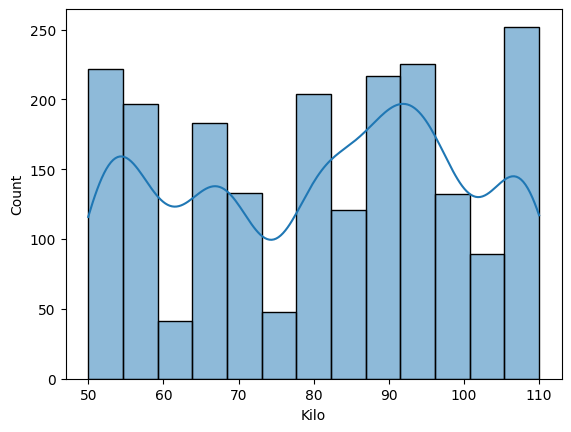

In [70]:
sns.histplot(data['Kilo'], kde = True)
plt.show()

In [71]:
data['Kilo'] = data['Kilo'].fillna(data['Kilo'].mean())
#Dağılımda göze batan çarpıklık mevcut değil.
#Aynı zamanda mean, median değerleri birbirne yakın eksik verileri doldururken ortalama değeri göz önüne alarak gerçekleştirdim.

# Boy Özniteliği

In [72]:
data['Boy'].describe()

count    2243.000000
mean      174.638431
std        16.516552
min       145.000000
25%       160.000000
50%       176.000000
75%       187.000000
max       203.000000
Name: Boy, dtype: float64

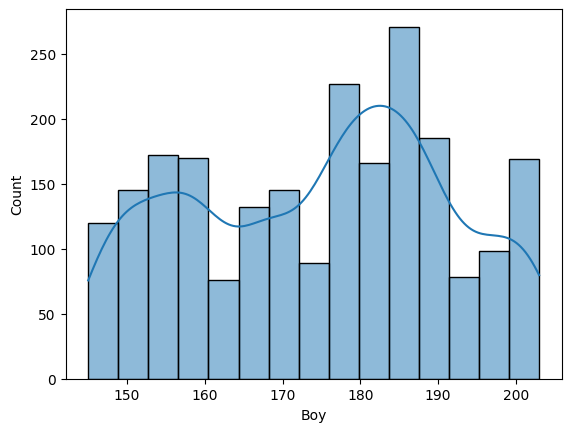

In [73]:
sns.histplot(data['Boy'], kde = True)
plt.show()

In [74]:
#Çok net bir çarpıklık gözükmese de Boy özniteliğinin dağılımı sol çarpıklığa(left-skewed) daha yatkın.
#Bu yüzden eksik verileri median değeri ile doldurmak daha uygundur diye düşünüyorum.
data['Boy'] = data['Boy'].fillna(data['Boy'].median())

# Boy ve Kilo Öznitelikleri kullanılarak vücut kitle endeksi özniteliği oluşturma

In [75]:
#Kişinin obezite durumu göz önüne alınarak kullandığı ilaçlar veya kronik hastalıklarının bu endeksi bağlı incelenebilmesi için oluşturdum.
data['Vke'] =  data['Kilo'] / ((data['Boy'] / 100) **2)

In [76]:
data['Vke'].describe()

count    2357.000000
mean       27.336497
std         8.384723
min        12.623450
25%        20.836367
50%        26.566840
75%        32.393910
max        49.979175
Name: Vke, dtype: float64

# Özniteliklerin incelenmesinden sonra elde edilen veri seti

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2357 entries, 0 to 2356
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Kullanici_id                      2357 non-null   int64         
 1   Cinsiyet                          2357 non-null   object        
 2   Dogum_Tarihi                      2357 non-null   datetime64[ns]
 3   Uyruk                             2357 non-null   object        
 4   Il                                2357 non-null   object        
 5   Ilac_Adi                          2357 non-null   object        
 6   Ilac_Baslangic_Tarihi             2357 non-null   datetime64[ns]
 7   Ilac_Bitis_Tarihi                 2357 non-null   datetime64[ns]
 8   Yan_Etki                          2357 non-null   object        
 9   Yan_Etki_Bildirim_Tarihi          2357 non-null   datetime64[ns]
 10  Alerjilerim                       2357 non-null 

***Task olarak verilmedi fakat öznitelikler hakkında gözlem yaparak ilişki çıkarımları yapılması model aşamasını geliştirebilir.***

Note: Çıkarımlar yapılmadı. Talep edilirse grafikler çoğaltılıp öznitelikler arası çıkarımlar da yapabilirim.

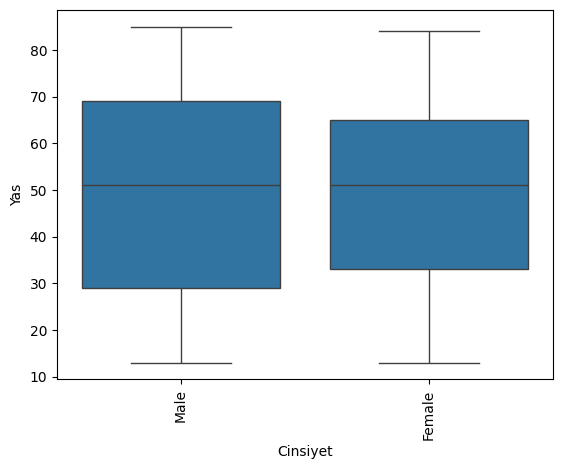

In [110]:
sns.boxplot(data = data, x = 'Cinsiyet', y = 'Yas')
plt.xticks(rotation = 90)
plt.show()

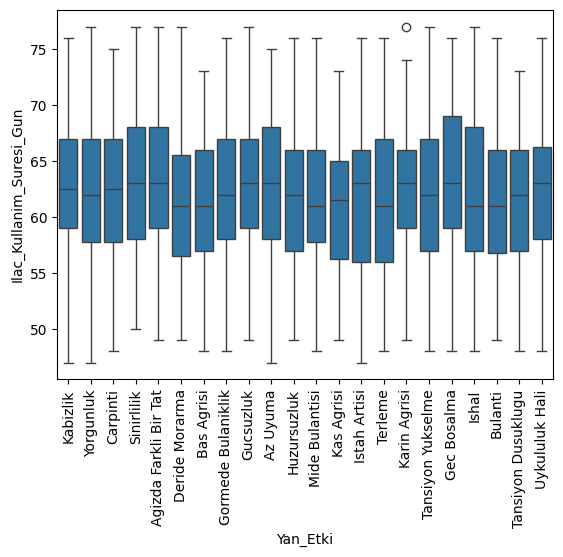

In [112]:
sns.boxplot(data = data, x = 'Yan_Etki', y = 'Ilac_Kullanim_Suresi_Gun')
plt.xticks(rotation = 90)
plt.show()

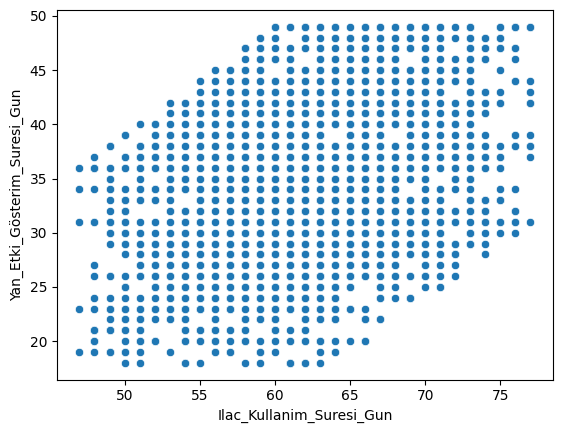

In [116]:
sns.scatterplot(data, x='Ilac_Kullanim_Suresi_Gun', y= 'Yan_Etki_Gösterim_Suresi_Gun')
plt.show()

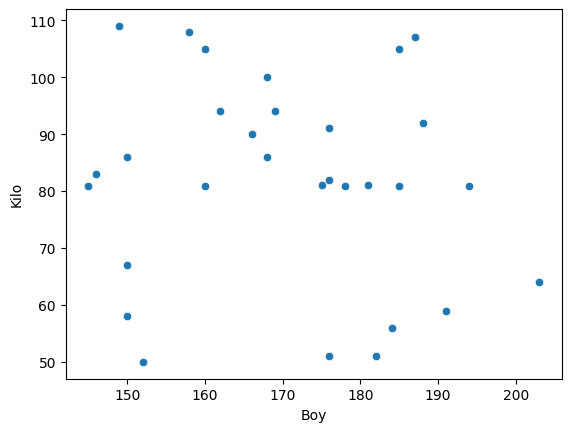

In [79]:
sns.scatterplot(data.loc[data['Kronik Hastaliklarim'] == 'Yok', ['Boy', 'Kilo', 'Kronik Hastaliklarim']], x='Boy', y= 'Kilo')
plt.show()

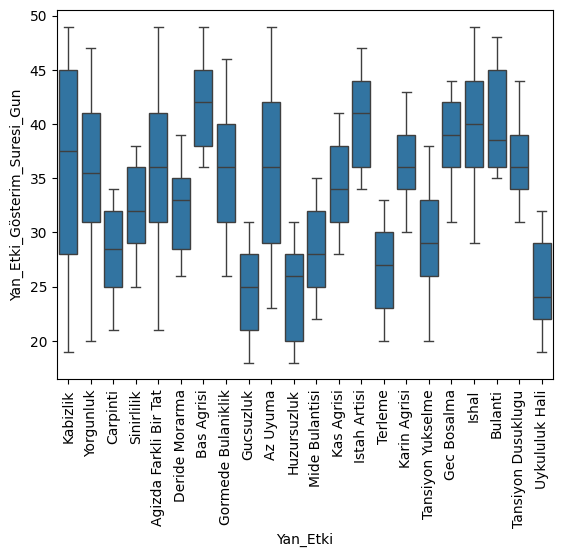

In [80]:
sns.boxplot(data = data, x = 'Yan_Etki', y = 'Yan_Etki_Gösterim_Suresi_Gun')
plt.xticks(rotation = 90)
plt.show()

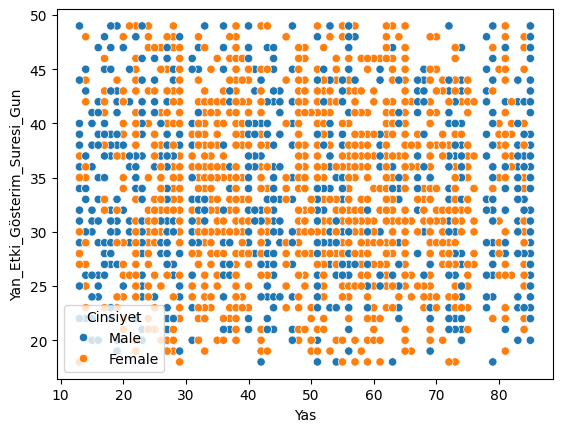

In [81]:
sns.scatterplot(data = data, x = 'Yas', y = 'Yan_Etki_Gösterim_Suresi_Gun', hue = 'Cinsiyet')
plt.show()

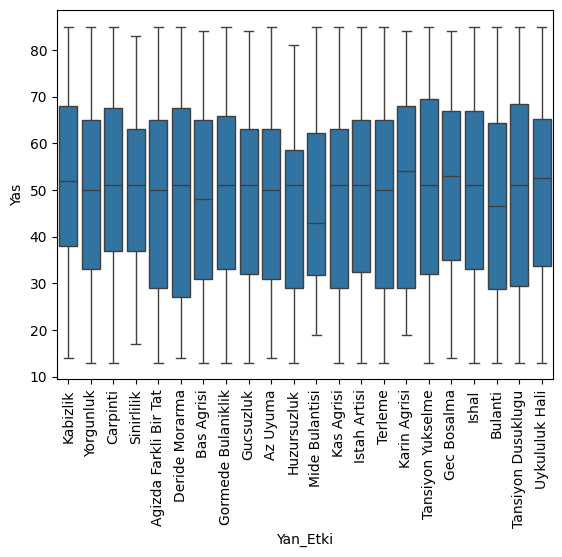

In [82]:
sns.boxplot(data = data, x = 'Yan_Etki', y = 'Yas')
plt.xticks(rotation = 90)
plt.show()

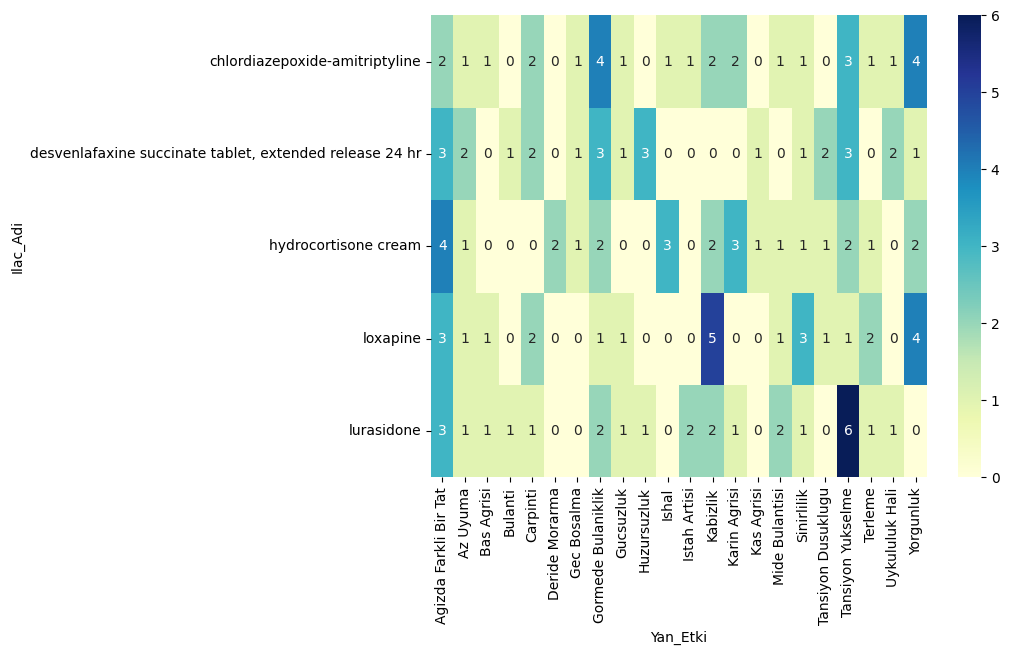

In [83]:
top_categories = data['Ilac_Adi'].value_counts().nlargest(5).index
filtered_df = data[data['Ilac_Adi'].isin(top_categories)]

# Create a cross-tabulation of the counts
cross_tab = pd.crosstab(filtered_df['Ilac_Adi'], filtered_df['Yan_Etki'])

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', fmt='d')
plt.show()

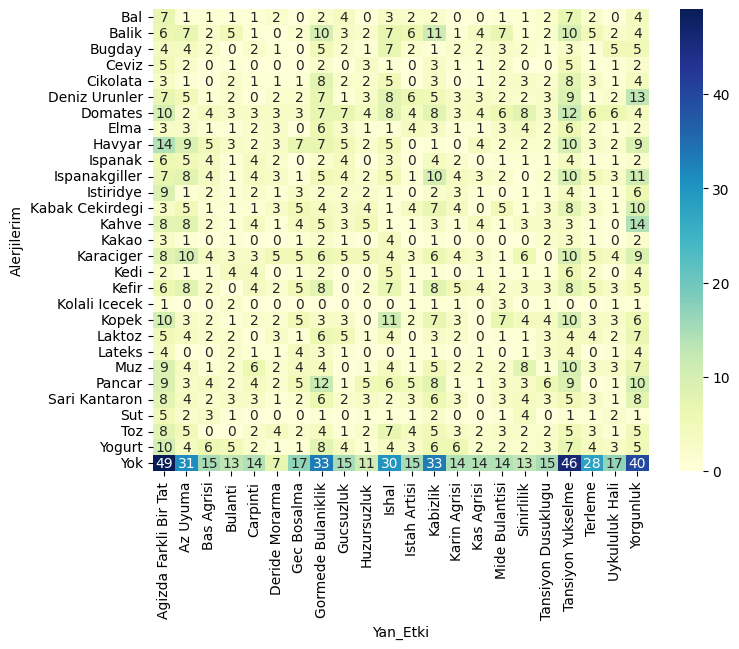

In [84]:
cross_tab = pd.crosstab(data['Alerjilerim'], data['Yan_Etki'])
plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab, annot=True, cmap='YlGnBu')
plt.show()
#Gözleme örnek olması açısından;
#Kahveye alerjisi olanların yorgunluk yan etkisine sahip olduğu durumların diğer durumlara göre daha çok olduğu gözlemleniyor.

# Veri Setinin Son Halinin Modelleme için Hazırlanması

In [85]:
train_data = data.copy()

In [86]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2357 entries, 0 to 2356
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Kullanici_id                      2357 non-null   int64         
 1   Cinsiyet                          2357 non-null   object        
 2   Dogum_Tarihi                      2357 non-null   datetime64[ns]
 3   Uyruk                             2357 non-null   object        
 4   Il                                2357 non-null   object        
 5   Ilac_Adi                          2357 non-null   object        
 6   Ilac_Baslangic_Tarihi             2357 non-null   datetime64[ns]
 7   Ilac_Bitis_Tarihi                 2357 non-null   datetime64[ns]
 8   Yan_Etki                          2357 non-null   object        
 9   Yan_Etki_Bildirim_Tarihi          2357 non-null   datetime64[ns]
 10  Alerjilerim                       2357 non-null 

In [87]:
train_data = train_data.iloc[:,[0,1,5,8,16,17,18,19,20,21,23,24,25,26,27,28,29,30,31,32,33,34,35]]

# Sayısal Değerlerin Dağılımları ve Normalizasyon İşlemleri

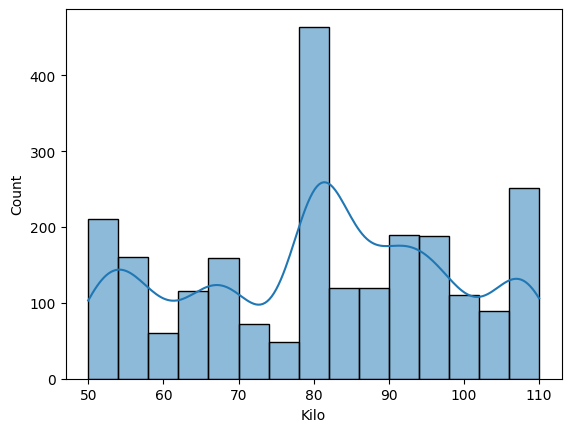

In [88]:
sns.histplot(train_data['Kilo'], kde = True)
plt.show()

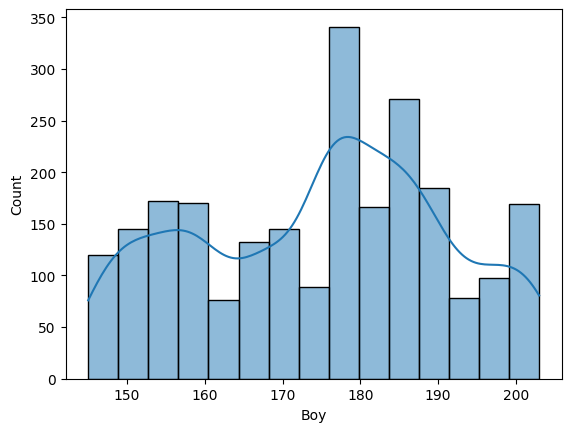

In [89]:
sns.histplot(train_data['Boy'], kde = True)
plt.show()

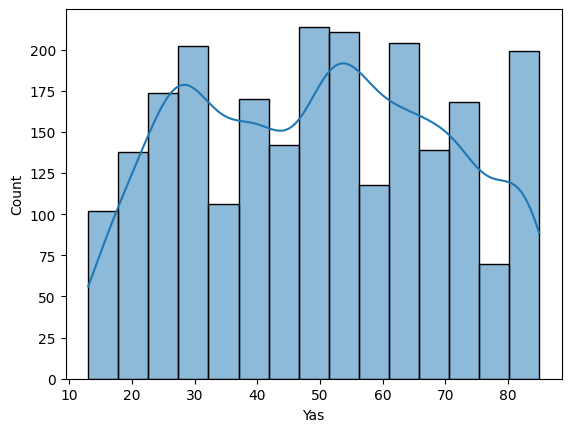

In [90]:
sns.histplot(train_data['Yas'], kde = True)
plt.show()

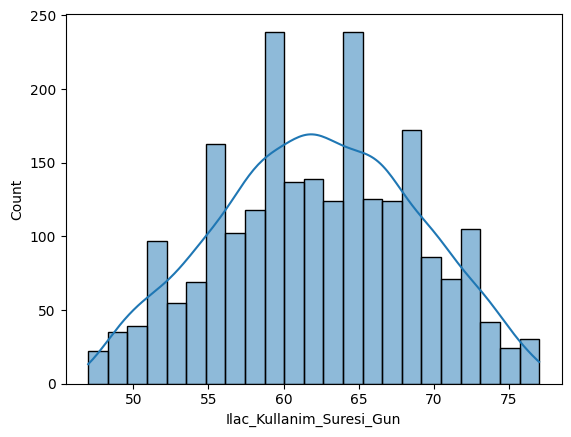

In [91]:
sns.histplot(train_data['Ilac_Kullanim_Suresi_Gun'], kde = True)
plt.show()

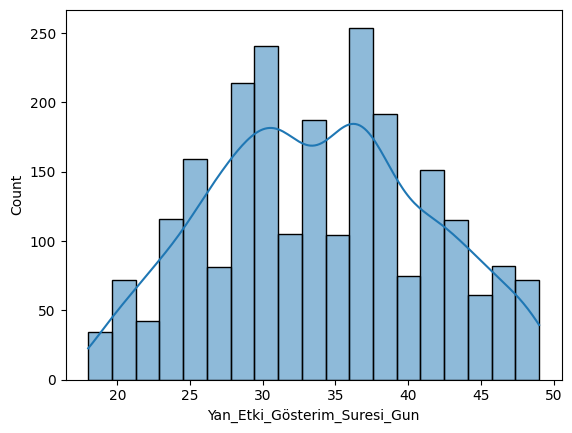

In [92]:
sns.histplot(train_data['Yan_Etki_Gösterim_Suresi_Gun'], kde = True)
plt.show()

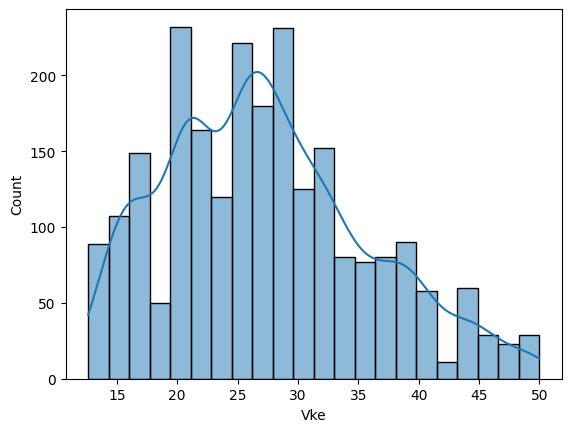

In [93]:
sns.histplot(train_data['Vke'], kde = True)
plt.show()

In [94]:
#Standardizasyon ile Normalizasyon işlemlerinin kullanılacak modele göre uygulama yeri değişebilir.
#Hangi model kullanılacağı belirtilmediğinden ve bolca kategorik değişkenden oluşan bir veri seti olduğu için analizin devamında 
#Feature Selection veya Dimensionality Reduction yöntemleri kullanılabileceği göz önüne alınarak veriler üzerinde Normalizasyon işlemi uygulayacağım.

In [95]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_data.loc[:,['Kilo', 'Boy', 'Yas', 'Ilac_Kullanim_Suresi_Gun', 'Yan_Etki_Gösterim_Suresi_Gun', 'Vke']] = scaler.fit_transform(train_data[['Kilo', 'Boy', 'Yas', 'Ilac_Kullanim_Suresi_Gun', 'Yan_Etki_Gösterim_Suresi_Gun', 'Vke']])

C:\Users\PC\AppData\Local\Temp\ipykernel_17512\2223490457.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.70833333 1.         0.48611111 ... 0.83333333 0.43055556 0.34722222]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  train_data.loc[:,['Kilo', 'Boy', 'Yas', 'Ilac_Kullanim_Suresi_Gun', 'Yan_Etki_Gösterim_Suresi_Gun', 'Vke']] = scaler.fit_transform(train_data[['Kilo', 'Boy', 'Yas', 'Ilac_Kullanim_Suresi_Gun', 'Yan_Etki_Gösterim_Suresi_Gun', 'Vke']])
C:\Users\PC\AppData\Local\Temp\ipykernel_17512\2223490457.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.23333333 0.36666667 0.43333333 ... 0.73333333 0.6        0.4       ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  train_data.loc[:,['Kilo', 'Boy', 'Yas', 'Ilac_Kullanim_Suresi_Gun', 'Yan_Etki_

# Kategorik Değişkenlerin Encode Edilmesi

In [96]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2357 entries, 0 to 2356
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Kullanici_id                  2357 non-null   int64  
 1   Cinsiyet                      2357 non-null   object 
 2   Ilac_Adi                      2357 non-null   object 
 3   Yan_Etki                      2357 non-null   object 
 4   Kan Grubu                     2357 non-null   object 
 5   Kilo                          2357 non-null   float64
 6   Boy                           2357 non-null   float64
 7   Yas                           2357 non-null   float64
 8   Ilac_Kullanim_Suresi_Gun      2357 non-null   float64
 9   Yan_Etki_Gösterim_Suresi_Gun  2357 non-null   float64
 10  Hasta__Alzheimer              2357 non-null   int64  
 11  Hasta__Astim                  2357 non-null   int64  
 12  Hasta__Diger                  2357 non-null   int64  
 13  Has

In [97]:
#Veri setimizde bulunan kategorik değişkenlerin hepsi nominal kategorik değişken olduğundan dolayı 'One Hot Encoding' yöntemini uygulayacağım.
#Not: Modelleme kısmında target değerine bağlı olarak 'Ilac_Adi' gibi bolca kategoriye sahip kategorik özniteliklerde
#Target Encoding veya Frequency Encoding yöntemi de kullanılabilir.

In [98]:
train_data['Cinsiyet'].value_counts()

Cinsiyet
Female    1396
Male       961
Name: count, dtype: int64

In [99]:
cinsiyet_mapping = {'Male' : 1, 'Female' : 0}
train_data.loc[:,['Cinsiyet']] = train_data['Cinsiyet'].map(cinsiyet_mapping)

In [100]:
train_data = pd.get_dummies(train_data, columns=['Ilac_Adi', 'Kan Grubu'], dtype = 'int')

In [102]:
#Yan Etki öngürülecek öznitelik(Target value) üzerinde sınıflandırma yapabilmem için 'Label Encoding' gerçekleştireceğim.

In [106]:
train_data['Yan_Etki'].value_counts()

Yan_Etki
Agizda Farkli Bir Tat    229
Tansiyon Yukselme        227
Yorgunluk                204
Gormede Bulaniklik       170
Kabizlik                 156
Ishal                    145
Az Uyuma                 141
Terleme                   97
Sinirlilik                81
Gec Bosalma               81
Gucsuzluk                 81
Mide Bulantisi            80
Tansiyon Dusuklugu        74
Carpinti                  72
Istah Artisi              71
Bas Agrisi                71
Karin Agrisi              69
Uykululuk Hali            68
Bulanti                   64
Huzursuzluk               63
Kas Agrisi                58
Deride Morarma            55
Name: count, dtype: int64

In [107]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_data['Yan_Etki'] = le.fit_transform(train_data['Yan_Etki'])

# Modelleme için hazır olan veri çerçevesi

In [108]:
train_data.head(10)

,Kullanici_id,Cinsiyet,Yan_Etki,Kilo,Boy,Yas,Ilac_Kullanim_Suresi_Gun,Yan_Etki_Gösterim_Suresi_Gun,Hasta__Alzheimer,Hasta__Astim,Hasta__Diger,Hasta__Diyabet,Hasta__Guatr,Hasta__Hipertansiyon,Hasta__KOAH,Hasta__Kalp Hastaliklari,Hasta__Kan Hastaliklari,Hasta__Kanser,Hasta__Kemik Erimesi,Hasta__Yok,Vke,Ilac_Adi_Levomilnacipran,Ilac_Adi_Mometasone furoate,Ilac_Adi_Prednicarbate cream,Ilac_Adi_alprazolam,Ilac_Adi_alprazolam concentrate,Ilac_Adi_alprazolam er,Ilac_Adi_alprazolam intensol,Ilac_Adi_alprazolam odt,Ilac_Adi_amitriptyline hcl,Ilac_Adi_amoksapin,Ilac_Adi_aripipirazol,Ilac_Adi_aripiprazole,Ilac_Adi_aripiprazole odt,Ilac_Adi_aripiprazole tablet with sensor and patch,Ilac_Adi_asenapine sublingual tablet,"Ilac_Adi_asenapine tablet, sublingual","Ilac_Adi_betamethasone dipropionate aerosol, spray with pump",Ilac_Adi_betamethasone dipropionate cream,Ilac_Adi_betamethasone valerate foam,Ilac_Adi_betamethasone valerate ointment,Ilac_Adi_brexpiprazole,"Ilac_Adi_bupropion hbr tablet, extended release 24 hr",Ilac_Adi_bupropion hcl,Ilac_Adi_butisol sodium,Ilac_Adi_carbamazepine,Ilac_Adi_carbamazepine cr,Ilac_Adi_carbamazepine extended release,Ilac_Adi_cariprazine,Ilac_Adi_chlordiazepoxide hcl,Ilac_Adi_chlordiazepoxide-amitriptyline,Ilac_Adi_chlorpromazine hcl,Ilac_Adi_citalopram,Ilac_Adi_clindamycin phosphate - benzoyl peroxide,Ilac_Adi_clomipramine hcl,Ilac_Adi_clonazepam,"Ilac_Adi_clonazepam tablet, disintegratingclozapine",Ilac_Adi_desipramine,Ilac_Adi_desonide foam,Ilac_Adi_desonide lotion,Ilac_Adi_desonide ointment,Ilac_Adi_desoximetasone ointment,"Ilac_Adi_desoximetasone spray, non-aerosol",Ilac_Adi_desvenlafaxine er,"Ilac_Adi_desvenlafaxine succinate tablet, extended release 24 hr",Ilac_Adi_diazepam,Ilac_Adi_dipyridamole,Ilac_Adi_divalproeks sodyum,Ilac_Adi_divalproeks sodyum er,Ilac_Adi_divalproeks sodyum sprinkle,Ilac_Adi_divalproex sodium,"Ilac_Adi_divalproex sodium capsule, sprinkle",Ilac_Adi_divalproex sodium er,Ilac_Adi_doxepin hcl capsule,Ilac_Adi_doxepin hcl cream,Ilac_Adi_doxepin hcl tablet,"Ilac_Adi_duloxetine 60 mg capsule,delayed release sprinkle",Ilac_Adi_duloxetine delayed release capsules,Ilac_Adi_duloxetine hcl,Ilac_Adi_duloxetine hydrochloride,Ilac_Adi_escitalopram,Ilac_Adi_fluocinolone acetonide cream,Ilac_Adi_fluocinolone acetonide oil,"Ilac_Adi_fluocinolone acetonide solution, non-",Ilac_Adi_fluocinolone shampoo,Ilac_Adi_fluocinonide cream,Ilac_Adi_fluoxetine,Ilac_Adi_fluoxetine dr,Ilac_Adi_fluphenazine decanoate vial,Ilac_Adi_fluphenazine hcl,Ilac_Adi_fluphenazine hcl elixir,Ilac_Adi_fluphenazine hcl tablet,Ilac_Adi_fluvoxamine maleate,Ilac_Adi_fluvoxamine maleate er,Ilac_Adi_halobetasol propionate cream,Ilac_Adi_halobetasol propionate foam,Ilac_Adi_haloperidol decanoate,Ilac_Adi_haloperidol lactate,Ilac_Adi_hydrocortisone cream,Ilac_Adi_hydroxyzine,Ilac_Adi_hydroxyzine hcl,Ilac_Adi_iloperidone,Ilac_Adi_imipramine hcl,Ilac_Adi_imipramine pamoate,Ilac_Adi_isocarboxazid tablet,Ilac_Adi_lamictal xr,Ilac_Adi_lamotrigine,Ilac_Adi_lamotrigine er,Ilac_Adi_lithium carbonate,Ilac_Adi_lithium carbonate er,Ilac_Adi_lorazepam,Ilac_Adi_lorazepam concentrate,Ilac_Adi_lorazepam injection,Ilac_Adi_lorazepam vial,Ilac_Adi_loxapine,Ilac_Adi_lurasidone,Ilac_Adi_maprotiline hcl,Ilac_Adi_methylphenidate,Ilac_Adi_methylphenidate er,"Ilac_Adi_methylphenidate er 100 mg capsule,delayed release,ext release sprinkle","Ilac_Adi_methylphenidate er tablet, extended release 24 hr",Ilac_Adi_methylphenidate hcl solution,"Ilac_Adi_methylphenidate hcl tablet, chewable","Ilac_Adi_methylphenidate suspension, extended release 24 hr, reconstituted (suspension, er reconstituted)","Ilac_Adi_methylphenidate tablet,chewable,immediate release and extended release,biphasic 24 hr (tablet,chew,immed-exten.rel 24hr)",Ilac_Adi_midazolam,Ilac_Adi_mirtazapine,Ilac_Adi_mometasone furoate ointment,Ilac_Adi_nefazodone hcl,Ilac_Adi_nortriptyline,Ilac_Adi_olanzapine,Ilac_Adi_olanzapine odt,Ilac_Adi_olanzapine vial,Ilac_Adi_olanzapine-fluoxetine,Ilac_Adi_oxymorp

In [95]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2357 entries, 0 to 2356
Columns: 201 entries, Kullanici_id to Kan Grubu_B RH-
dtypes: float64(6), int64(194), object(1)
memory usage: 3.6+ MB
